In [1]:
from os import path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme()

In [ ]:
# from https://collegescorecard.ed.gov/data
# import data

df = pd.read_csv(
    path.join(
        "..",
        "data",
        "Most-Recent-Cohorts-Institution.csv",

    ),
    low_memory=False,
)
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,SCORECARD_SECTOR
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0,4
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0,4
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0,5
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0,4
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0,4


## Useful Columns

| Key               | Description                                                               | Values                                              |
| ----------------- | ------------------------------------------------------------------------- | --------------------------------------------------- |
| `INSTNM`          | Institution name                                                          |                                                     |
| `CONTROL`         | Control of institution (IPEDS)                                            | 1=Public, 2=Private Nonprofit, 3=Private For-Profit |
| `ADM_RATE`        | Admission Rate                                                            |                                                     |
| `COSTT4_A`        | Average cost of attendance (academic year institutions)                   |                                                     |
| `MD_EARN_WNE_P6`  | Median earnings of students working and not enrolled 6 years after entry  |                                                     |
| `MD_EARN_WNE_P8`  | Median earnings of students working and not enrolled 8 years after entry  |                                                     |
| `MD_EARN_WNE_P10` | Median earnings of students working and not enrolled 10 years after entry |                                                     |


In [4]:
# control type names
control_mappings = {1: "Public", 2: "Private Nonprofit", 3: "Private For-Profit"}

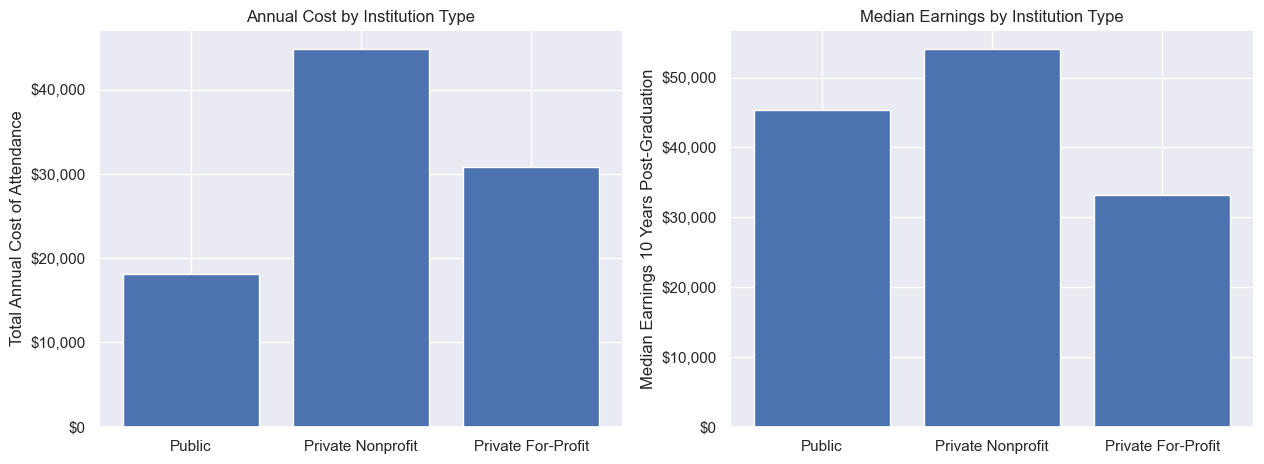

In [5]:
# cost and earnings by institution type
control_groups = df[["CONTROL", "COSTT4_A", "MD_EARN_WNE_P10"]].groupby(by="CONTROL")
data = control_groups.mean()
x = data.index.map(control_mappings)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12.8)
ax1.bar(x, data["COSTT4_A"])
ax1.yaxis.set_major_formatter("${x:,.0f}")
ax1.set_ylabel("Total Annual Cost of Attendance")
ax1.set_title("Annual Cost by Institution Type")
ax2.bar(x, data["MD_EARN_WNE_P10"])
ax2.yaxis.set_major_formatter("${x:,.0f}")
ax2.set_ylabel("Median Earnings 10 Years Post-Graduation")
ax2.set_title("Median Earnings by Institution Type")
fig.tight_layout()
plt.savefig(
    path.join(
        "..",
        "graph",
        "cost-earning-by-institution-type.png",
    )
)
plt.show()

In [6]:
from scipy import stats

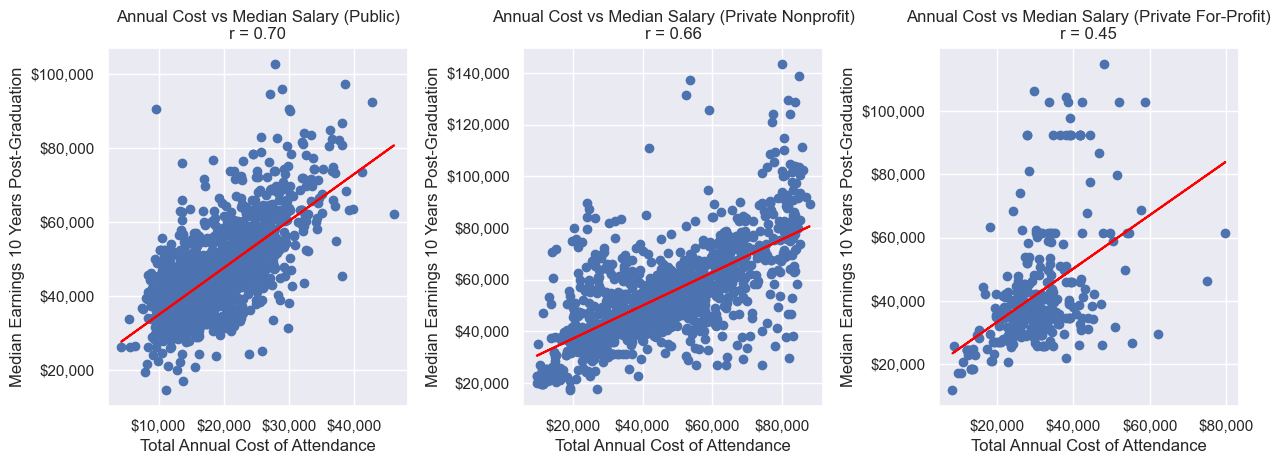

In [7]:
# cost vs earnings by institution type
fig, axes = plt.subplots(1, len(control_groups))
fig.set_figwidth(12.8)
for i, [control, group] in enumerate(control_groups):
    data = group[(group["COSTT4_A"] > 0) & (group["MD_EARN_WNE_P10"] > 0)]
    x, y = data["COSTT4_A"], data["MD_EARN_WNE_P10"]
    slope, intercept, r, _, _ = stats.linregress(x, y)
    ax = axes[i]
    ax.xaxis.set_major_formatter("${x:,.0f}")
    ax.yaxis.set_major_formatter("${x:,.0f}")
    ax.plot(x, slope * x + intercept, color="red")
    ax.scatter(x, y)
    ax.set_xlabel("Total Annual Cost of Attendance")
    ax.set_ylabel("Median Earnings 10 Years Post-Graduation")
    ax.set_title(
        f"Annual Cost vs Median Salary ({control_mappings[control]})\nr = {r:.2f}"
    )
plt.tight_layout()
plt.savefig(
    path.join(
        "..",
        "graph",
        "cost-vs-earning-by-institution-type.png",
    )
)
plt.show()